In [23]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 9, 19)
df = web.DataReader("FB", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997
2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002
2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002
2015-01-07,77.360001,75.820000,76.760002,76.150002,22045300,76.150002
2015-01-08,78.230003,76.080002,76.739998,78.180000,23961000,78.180000


# Visualization

Takes high low percentage and low high percentage of the stock.

In [24]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [26]:
mavg.tail(10)

Date
2019-09-06    187.7393
2019-09-09    187.8382
2019-09-10    187.9121
2019-09-11    188.0142
2019-09-12    188.0745
2019-09-13    188.1086
2019-09-16    188.1450
2019-09-17    188.0932
2019-09-18    188.0597
2019-09-19    188.0133
Name: Adj Close, dtype: float64

In [27]:
df.tail

<bound method NDFrame.tail of                   High         Low        Open       Close    Volume  \
Date                                                                   
2015-01-02   78.930000   77.699997   78.580002   78.449997  18177500   
2015-01-05   79.250000   76.860001   77.980003   77.190002  26452200   
2015-01-06   77.589996   75.360001   77.230003   76.150002  27399300   
2015-01-07   77.360001   75.820000   76.760002   76.150002  22045300   
2015-01-08   78.230003   76.080002   76.739998   78.180000  23961000   
...                ...         ...         ...         ...       ...   
2019-09-13  187.970001  186.539993  187.330002  187.190002  11441100   
2019-09-16  187.789993  185.770004  186.929993  186.220001   8444800   
2019-09-17  188.320007  185.539993  186.660004  188.080002   9671100   
2019-09-18  189.080002  186.009995  188.089996  188.139999   9681900   
2019-09-19  191.100006  188.149994  188.660004  190.139999  10392700   

             Adj Close  
Date    

In [28]:
df.shape

(1187, 6)

In [30]:
df['HighLow_PCT']= (df['High'] - df['Low']) / df['Close'] * 100 
df['PCT_CHANGE'] = (df['Close'] - df['Open']) / df['Open'] * 100

df.tail()

,High,Low,Open,Close,Volume,Adj Close,HighLow_PCT,PCT_CHANGE
Date,,,,,,,,
2019-09-13,187.970001,186.539993,187.330002,187.190002,11441100,187.190002,0.763934,-0.074734
2019-09-16,187.789993,185.770004,186.929993,186.220001,8444800,186.220001,1.084733,-0.379817
2019-09-17,188.320007,185.539993,186.660004,188.080002,9671100,188.080002,1.478102,0.760740
2019-09-18,189.080002,186.009995,188.089996,188.139999,9681900,188.139999,1.631767,0.026585
2019-09-19,191.100006,188.149994,188.660004,190.139999,10392700,190.139999,1.551495,0.784478


In [31]:
window_size = 35 # this is allowing us to look back 32 days in past
# Prepare the data so that we have 32 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [32]:
data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples

In [34]:
data.shape

(1152, 36)

In [39]:
X = data[1:, :-1] #Each row represents 35 days in the past
y = data[:, -1] # Each output value represents the 36th day 

In [40]:
# Train and test split

In [41]:
split_fraction = .8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

In [42]:
X_train.shape

(921, 35)

In [43]:
y_train.shape

(921,)

# Model 1 Ridge Regression

Helps prevent models from overfitting

In [52]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
# Infer
y_pred_ridge = ridge_model.predict(X_test)


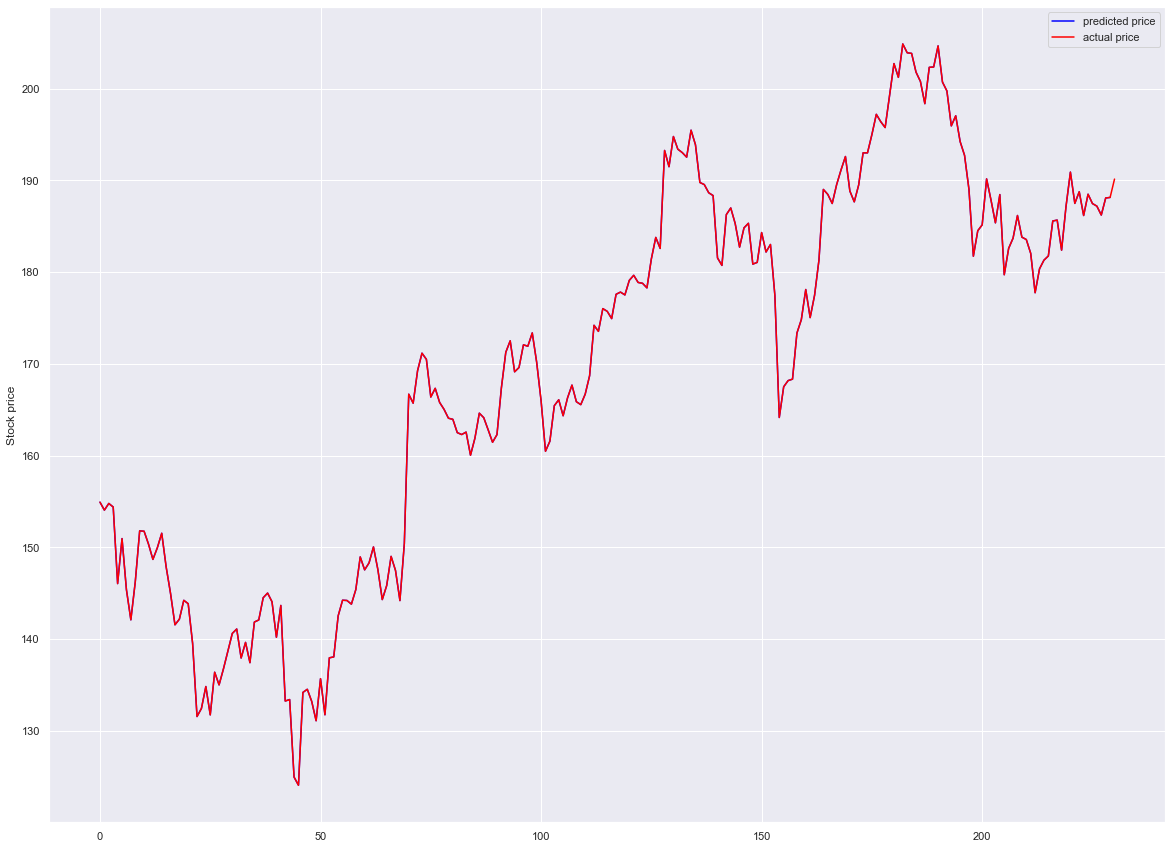

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.plot(y_pred_ridge, color="blue")
plt.plot(y_test, color="red")
plt.legend(['predicted price','actual price'])
plt.ylabel('Stock price')

plt.show()

# Model 2: Gradient Boosting Trees

In [58]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Infer
y_pred_gb = gb_model.predict(X_test)

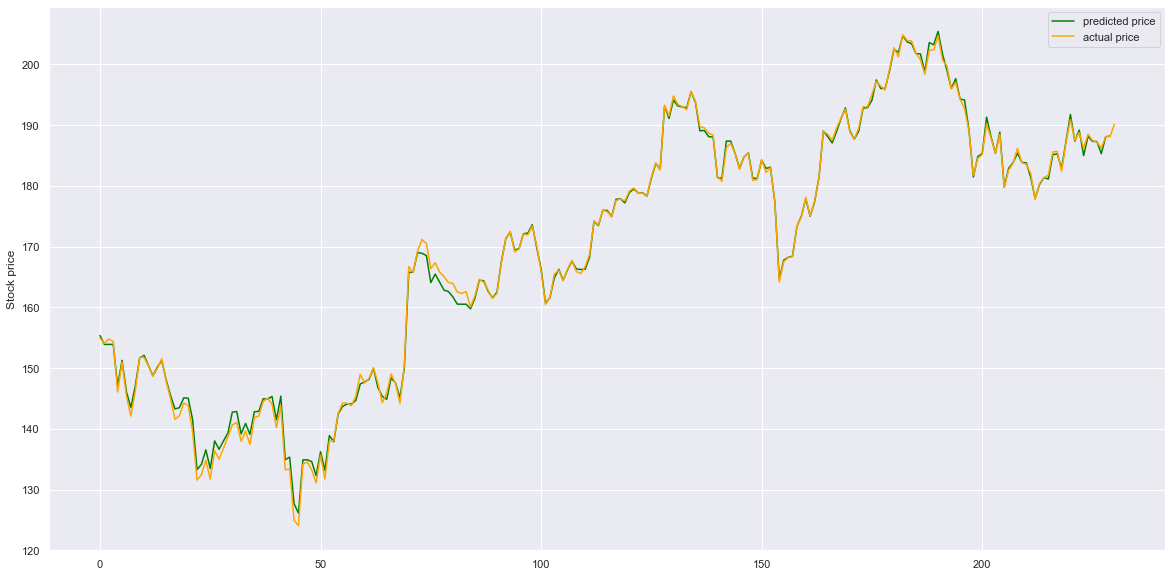

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_gb, color="green")
plt.plot(y_test, color="orange")
plt.legend(['predicted price','actual price'])
plt.ylabel('Stock price')

plt.show()

# Model 3: Random Forest Regressior

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


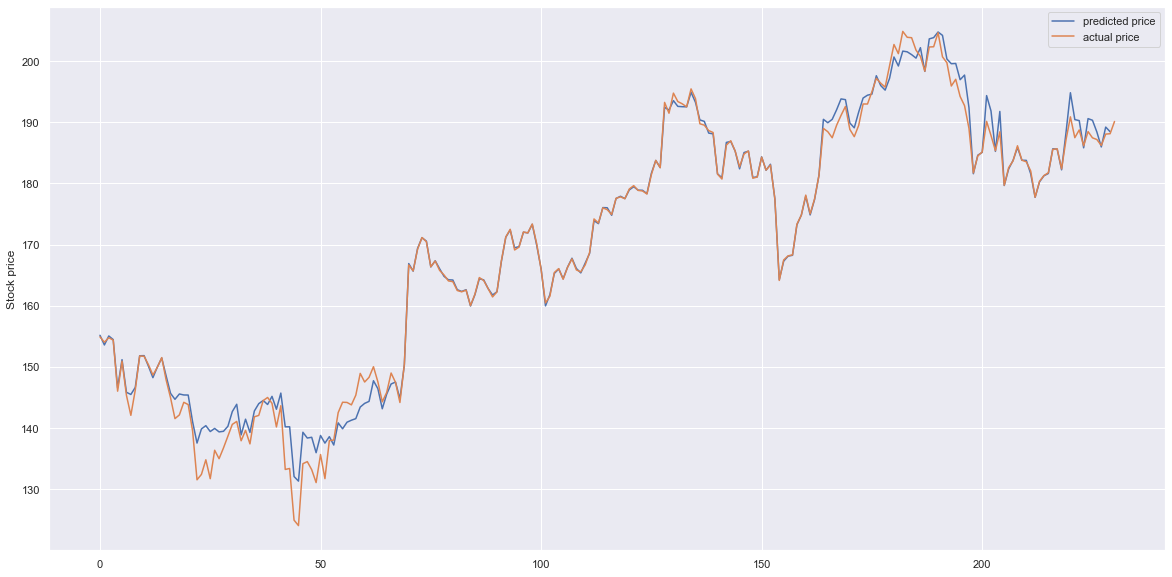

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_rf)
plt.plot(y_test)
plt.legend(['predicted price','actual price'])
plt.ylabel('Stock price')

plt.show()

# Model 4: Keras Regression

In [72]:
from keras import Sequential
from keras.layers import Dense,Dropout
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=128, input_dim=35))
    regressor.add(Dense(units=64))
    regressor.add(Dense(units=35))
    regressor.add(Dense(units=16))
    regressor.add(Dense(units=8))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',)
    return regressor

In [73]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=1024,epochs=1000)

In [74]:
results=regressor.fit(X_train,y_train)

Epoch 1/1000
921/921 [==============================] - 1s 570us/step - loss: 64920.0820
Epoch 2/1000
921/921 [==============================] - 0s 8us/step - loss: 5369.9629
Epoch 3/1000
921/921 [==============================] - 0s 12us/step - loss: 11338.5439
Epoch 4/1000
921/921 [==============================] - 0s 11us/step - loss: 33363.6133
Epoch 5/1000
921/921 [==============================] - 0s 10us/step - loss: 26234.9004
Epoch 6/1000
921/921 [==============================] - 0s 10us/step - loss: 9066.6318
Epoch 7/1000
921/921 [==============================] - 0s 12us/step - loss: 215.2493
Epoch 8/1000
921/921 [==============================] - 0s 16us/step - loss: 3390.2786
Epoch 9/1000
921/921 [==============================] - 0s 14us/step - loss: 10623.9883
Epoch 10/1000
921/921 [==============================] - 0s 15us/step - loss: 14006.8896
Epoch 11/1000
921/921 [==============================] - 0s 8us/step - loss: 11543.1650
Epoch 12/1000
921/921 [=============

921/921 [==============================] - 0s 9us/step - loss: 35.1646
Epoch 97/1000
921/921 [==============================] - 0s 7us/step - loss: 35.2081
Epoch 98/1000
921/921 [==============================] - 0s 9us/step - loss: 34.5651
Epoch 99/1000
921/921 [==============================] - 0s 7us/step - loss: 33.6519
Epoch 100/1000
921/921 [==============================] - 0s 10us/step - loss: 33.0387
Epoch 101/1000
921/921 [==============================] - 0s 9us/step - loss: 32.9573
Epoch 102/1000
921/921 [==============================] - 0s 10us/step - loss: 33.1681
Epoch 103/1000
921/921 [==============================] - 0s 11us/step - loss: 33.2374
Epoch 104/1000
921/921 [==============================] - 0s 9us/step - loss: 32.9302
Epoch 105/1000
921/921 [==============================] - 0s 11us/step - loss: 32.3726
Epoch 106/1000
921/921 [==============================] - 0s 9us/step - loss: 31.8828
Epoch 107/1000
921/921 [==============================] - 0s 8us/ste

921/921 [==============================] - 0s 9us/step - loss: 20.5144
Epoch 192/1000
921/921 [==============================] - 0s 8us/step - loss: 20.4324
Epoch 193/1000
921/921 [==============================] - 0s 14us/step - loss: 20.3516
Epoch 194/1000
921/921 [==============================] - 0s 13us/step - loss: 20.2715
Epoch 195/1000
921/921 [==============================] - 0s 9us/step - loss: 20.1921
Epoch 196/1000
921/921 [==============================] - 0s 8us/step - loss: 20.1135
Epoch 197/1000
921/921 [==============================] - 0s 11us/step - loss: 20.0360
Epoch 198/1000
921/921 [==============================] - 0s 7us/step - loss: 19.9591
Epoch 199/1000
921/921 [==============================] - 0s 10us/step - loss: 19.8831
Epoch 200/1000
921/921 [==============================] - 0s 9us/step - loss: 19.8078
Epoch 201/1000
921/921 [==============================] - 0s 8us/step - loss: 19.7334
Epoch 202/1000
921/921 [==============================] - 0s 11us

921/921 [==============================] - 0s 10us/step - loss: 15.3487
Epoch 287/1000
921/921 [==============================] - 0s 7us/step - loss: 15.3115
Epoch 288/1000
921/921 [==============================] - 0s 7us/step - loss: 15.2744
Epoch 289/1000
921/921 [==============================] - 0s 7us/step - loss: 15.2376
Epoch 290/1000
921/921 [==============================] - 0s 12us/step - loss: 15.2009
Epoch 291/1000
921/921 [==============================] - 0s 9us/step - loss: 15.1645
Epoch 292/1000
921/921 [==============================] - 0s 10us/step - loss: 15.1282
Epoch 293/1000
921/921 [==============================] - 0s 9us/step - loss: 15.0922
Epoch 294/1000
921/921 [==============================] - 0s 11us/step - loss: 15.0563
Epoch 295/1000
921/921 [==============================] - 0s 8us/step - loss: 15.0205
Epoch 296/1000
921/921 [==============================] - 0s 7us/step - loss: 14.9849
Epoch 297/1000
921/921 [==============================] - 0s 8us/

921/921 [==============================] - 0s 10us/step - loss: 12.4022
Epoch 382/1000
921/921 [==============================] - 0s 9us/step - loss: 12.3757
Epoch 383/1000
921/921 [==============================] - 0s 7us/step - loss: 12.3492
Epoch 384/1000
921/921 [==============================] - 0s 7us/step - loss: 12.3228
Epoch 385/1000
921/921 [==============================] - 0s 9us/step - loss: 12.2965
Epoch 386/1000
921/921 [==============================] - 0s 8us/step - loss: 12.2703
Epoch 387/1000
921/921 [==============================] - 0s 11us/step - loss: 12.2441
Epoch 388/1000
921/921 [==============================] - 0s 8us/step - loss: 12.2180
Epoch 389/1000
921/921 [==============================] - 0s 9us/step - loss: 12.1919
Epoch 390/1000
921/921 [==============================] - 0s 7us/step - loss: 12.1659
Epoch 391/1000
921/921 [==============================] - 0s 8us/step - loss: 12.1400
Epoch 392/1000
921/921 [==============================] - 0s 8us/st

Epoch 477/1000
921/921 [==============================] - 0s 10us/step - loss: 10.1470
Epoch 478/1000
921/921 [==============================] - 0s 10us/step - loss: 10.1264
Epoch 479/1000
921/921 [==============================] - 0s 8us/step - loss: 10.1058
Epoch 480/1000
921/921 [==============================] - 0s 11us/step - loss: 10.0852
Epoch 481/1000
921/921 [==============================] - 0s 8us/step - loss: 10.0648
Epoch 482/1000
921/921 [==============================] - 0s 8us/step - loss: 10.0443
Epoch 483/1000
921/921 [==============================] - 0s 10us/step - loss: 10.0240
Epoch 484/1000
921/921 [==============================] - 0s 8us/step - loss: 10.0036
Epoch 485/1000
921/921 [==============================] - 0s 9us/step - loss: 9.9833
Epoch 486/1000
921/921 [==============================] - 0s 8us/step - loss: 9.9631
Epoch 487/1000
921/921 [==============================] - 0s 10us/step - loss: 9.9430
Epoch 488/1000
921/921 [============================

Epoch 573/1000
921/921 [==============================] - 0s 7us/step - loss: 8.3924
Epoch 574/1000
921/921 [==============================] - 0s 14us/step - loss: 8.3764
Epoch 575/1000
921/921 [==============================] - 0s 8us/step - loss: 8.3604
Epoch 576/1000
921/921 [==============================] - 0s 8us/step - loss: 8.3444
Epoch 577/1000
921/921 [==============================] - 0s 8us/step - loss: 8.3285
Epoch 578/1000
921/921 [==============================] - 0s 10us/step - loss: 8.3126
Epoch 579/1000
921/921 [==============================] - 0s 8us/step - loss: 8.2967
Epoch 580/1000
921/921 [==============================] - 0s 9us/step - loss: 8.2809
Epoch 581/1000
921/921 [==============================] - 0s 8us/step - loss: 8.2651
Epoch 582/1000
921/921 [==============================] - 0s 8us/step - loss: 8.2494
Epoch 583/1000
921/921 [==============================] - 0s 7us/step - loss: 8.2337
Epoch 584/1000
921/921 [==============================] - 0s 7u

Epoch 670/1000
921/921 [==============================] - 0s 7us/step - loss: 7.0078
Epoch 671/1000
921/921 [==============================] - 0s 8us/step - loss: 6.9951
Epoch 672/1000
921/921 [==============================] - 0s 10us/step - loss: 6.9825
Epoch 673/1000
921/921 [==============================] - 0s 7us/step - loss: 6.9699
Epoch 674/1000
921/921 [==============================] - 0s 11us/step - loss: 6.9574
Epoch 675/1000
921/921 [==============================] - 0s 9us/step - loss: 6.9449
Epoch 676/1000
921/921 [==============================] - 0s 8us/step - loss: 6.9324
Epoch 677/1000
921/921 [==============================] - 0s 8us/step - loss: 6.9199
Epoch 678/1000
921/921 [==============================] - 0s 9us/step - loss: 6.9075
Epoch 679/1000
921/921 [==============================] - 0s 11us/step - loss: 6.8951
Epoch 680/1000
921/921 [==============================] - 0s 8us/step - loss: 6.8828
Epoch 681/1000
921/921 [==============================] - 0s 6

921/921 [==============================] - 0s 9us/step - loss: 5.9193
Epoch 767/1000
921/921 [==============================] - 0s 11us/step - loss: 5.9092
Epoch 768/1000
921/921 [==============================] - 0s 9us/step - loss: 5.8990
Epoch 769/1000
921/921 [==============================] - 0s 9us/step - loss: 5.8890
Epoch 770/1000
921/921 [==============================] - 0s 8us/step - loss: 5.8789
Epoch 771/1000
921/921 [==============================] - 0s 8us/step - loss: 5.8688
Epoch 772/1000
921/921 [==============================] - 0s 6us/step - loss: 5.8588
Epoch 773/1000
921/921 [==============================] - 0s 8us/step - loss: 5.8488
Epoch 774/1000
921/921 [==============================] - 0s 8us/step - loss: 5.8388
Epoch 775/1000
921/921 [==============================] - 0s 8us/step - loss: 5.8289
Epoch 776/1000
921/921 [==============================] - 0s 8us/step - loss: 5.8189
Epoch 777/1000
921/921 [==============================] - 0s 8us/step - loss: 5

Epoch 863/1000
921/921 [==============================] - 0s 7us/step - loss: 5.0330
Epoch 864/1000
921/921 [==============================] - 0s 8us/step - loss: 5.0248
Epoch 865/1000
921/921 [==============================] - 0s 8us/step - loss: 5.0166
Epoch 866/1000
921/921 [==============================] - 0s 10us/step - loss: 5.0085
Epoch 867/1000
921/921 [==============================] - 0s 9us/step - loss: 5.0003
Epoch 868/1000
921/921 [==============================] - 0s 11us/step - loss: 4.9922
Epoch 869/1000
921/921 [==============================] - 0s 10us/step - loss: 4.9841
Epoch 870/1000
921/921 [==============================] - 0s 9us/step - loss: 4.9760
Epoch 871/1000
921/921 [==============================] - 0s 6us/step - loss: 4.9679
Epoch 872/1000
921/921 [==============================] - 0s 11us/step - loss: 4.9599
Epoch 873/1000
921/921 [==============================] - 0s 8us/step - loss: 4.9519
Epoch 874/1000
921/921 [==============================] - 0s 

921/921 [==============================] - 0s 9us/step - loss: 4.3232
Epoch 960/1000
921/921 [==============================] - 0s 8us/step - loss: 4.3165
Epoch 961/1000
921/921 [==============================] - 0s 9us/step - loss: 4.3099
Epoch 962/1000
921/921 [==============================] - 0s 13us/step - loss: 4.3033
Epoch 963/1000
921/921 [==============================] - 0s 10us/step - loss: 4.2967
Epoch 964/1000
921/921 [==============================] - 0s 8us/step - loss: 4.2902
Epoch 965/1000
921/921 [==============================] - 0s 12us/step - loss: 4.2836
Epoch 966/1000
921/921 [==============================] - 0s 8us/step - loss: 4.2771
Epoch 967/1000
921/921 [==============================] - 0s 6us/step - loss: 4.2706
Epoch 968/1000
921/921 [==============================] - 0s 8us/step - loss: 4.2640
Epoch 969/1000
921/921 [==============================] - 0s 8us/step - loss: 4.2575
Epoch 970/1000
921/921 [==============================] - 0s 9us/step - loss:

In [75]:
y_pred_dl = regressor.predict(X_test)

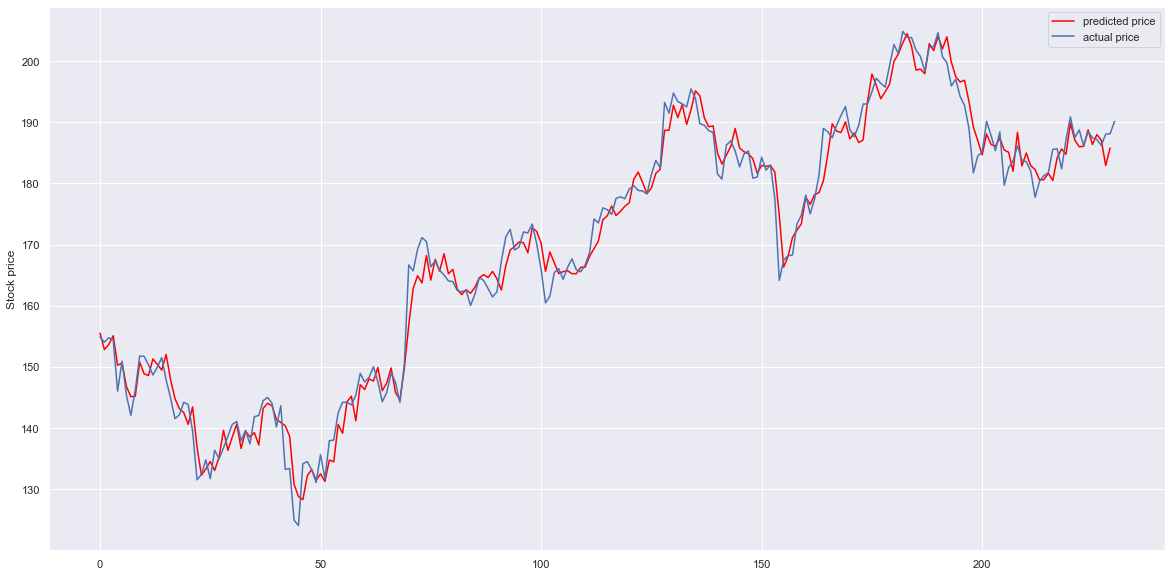

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_dl, color="red")
plt.plot(y_test)
plt.legend(['predicted price','actual price'])
plt.ylabel('Stock price')

plt.show()

# Conclusion

Ridge regression is not performing well in this particular situation. Maybe tuning the model would lead to a better
outcome.

The Gradient boosting Trees and the Random Forest model worked really well. 
Ultimately if were to do actually trading I would go with the Gradient boosting Trees model for Facebook's stock 
data.
